### Importing all the essential Python Libraries

All of the Essential Python libraries are loaded for performing the dataset analysis.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

### Defining the file path to the Decode events log dataset

The location of the JSON file is stored into the file_path variable for loading in the dataset

In [3]:
file_path = 'C://Users/Chiku/Downloads/Bitly Challenge/decodesab.json'

### Loading in the Decode log JSON dataset into Python

Using the json library of python and the load function, the entire dataset is loaded into decode_log

In [4]:
decode_log = [json.loads(line) for line in open(file_path)]

### Displaying the first two records from the Dataset

Taking a first look at the loaded dataset through the first two records field. This ensures that the dataset has been read properly and also gives some basic information regarding the attributes and values in the records.

In [5]:
decode_log[0]

{'a': 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.89 Safari/537.36',
 'c': 'BR',
 'cy': 'Recife',
 'g': '19jlpwu',
 'h': '19jlpwt',
 'nk': 1,
 't': 1427289010,
 'tz': 'America/Recife',
 'u': 'http://esporteinterativo.com.br/futebol-brasileiro/muricy-ramalho-revela-fator-que-causa-seus-problemas-de-saude-nao-suporto-coisa-errada/'}

In [6]:
decode_log[1]

{'a': 'Mozilla/5.0 (Linux; Android 5.0; SM-G900P Build/LRX21T) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/40.0.0.0 Mobile Safari/537.36',
 'c': 'US',
 'cy': 'Temperance',
 'g': '1y5BfRS',
 'h': '1y5BfRR',
 'mc': 505,
 'nk': 0,
 't': 1427289010,
 'tz': 'America/New_York',
 'u': 'http://trib.al/9DnaKzr'}

### Converting the Dataset into a Python DataFrame

The loaded dataset is now converted into a Python DataFrame, which makes the analysis easy and straightforward.

In [7]:
df = pd.DataFrame(decode_log)

#### Initial examination of the DataFrame

Further, the DataFrame created could be inspected using the pandas DataFrame's shape and head functions

In [8]:
df.shape

(3137627, 14)

In [9]:
df.head()

,a,c,ckw,cy,dp,g,h,kw,mc,nk,pp,t,tz,u
0,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,BR,NaN,Recife,NaN,19jlpwu,19jlpwt,NaN,NaN,1,NaN,1427289010,America/Recife,http://esporteinterativo.com.br/futebol-brasil...
1,Mozilla/5.0 (Linux; Android 5.0; SM-G900P Buil...,US,NaN,Temperance,NaN,1y5BfRS,1y5BfRR,NaN,505,0,NaN,1427289010,America/New_York,http://trib.al/9DnaKzr
2,Mozilla/5.0 (Linux; Android 4.4.2; K00E Build/...,TW,NaN,Tainan,NaN,1LWVHzT,1LWVHzS,NaN,NaN,1,NaN,1427289010,Asia/Taipei,https://tw.news.yahoo.com/blogs/society-watch/...
3,Mozilla/5.0 (Linux; U; Android 4.2.2; en-us; I...,US,NaN,Columbus,NaN,1xsVXk3,1xsVXk2,NaN,535,0,NaN,1427289010,America/New_York,http://trib.al/WmVq3Vz
4,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,US,NaN,Malden,NaN,1vxSX3F,1vxSX3E,NaN,506,1,NaN,1427289010,America/New_York,http://agents.trulia.com/l/42972/2014-11-21/sj...


### Beginning the dataset Analysis

#### Analysing the Top 10 Timezones for Bitlinks

Dealing with the Missing and Blank values for the Timezone, by putting in 'Missing' for the missing fields and 'Unknown' for the Blank fields

In [10]:
df['tz'].fillna(value='Missing', inplace=True)

In [11]:
df[df['tz'] == ''] = 'Unknown'

In [12]:
top_tz = df['tz'].value_counts()

Listing out the Top 10 Timezones for the Bitlinks

In [13]:
top_tz[:10]

America/New_York       466177
Missing                296888
America/Chicago        194975
Asia/Taipei            163667
America/Los_Angeles    129507
Asia/Tokyo             122138
Europe/London          110892
America/Sao_Paulo       95984
Europe/Paris            94823
Europe/Berlin           92840
Name: tz, dtype: int64

Visualizing the Top 10 Timezones for the Bitlinks

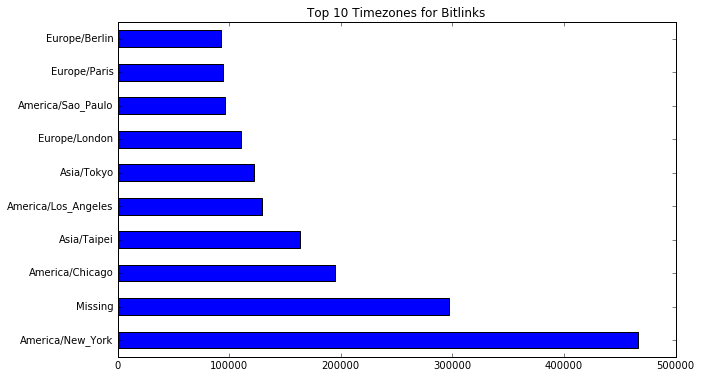

In [14]:
top_tz[:10].plot(kind='barh', figsize=(10, 6), title='Top 10 Timezones for Bitlinks')

#### Analyzing the Top 5 Browsers based on Bit.ly instances

Handling the missing data for the Browser User agent

In [15]:
web_browsers = df['a'].dropna()

Splitting the User browser agent data to obtain browser information

In [16]:
browser_type = Series([browser.split()[0] for browser in web_browsers])

Counting the number of Instances for all the top 5 browsers and loading it into a new variable

In [17]:
top_browsers = browser_type.value_counts()[:5]

Visualizing the Top 5 Browsers for the Bitlinks

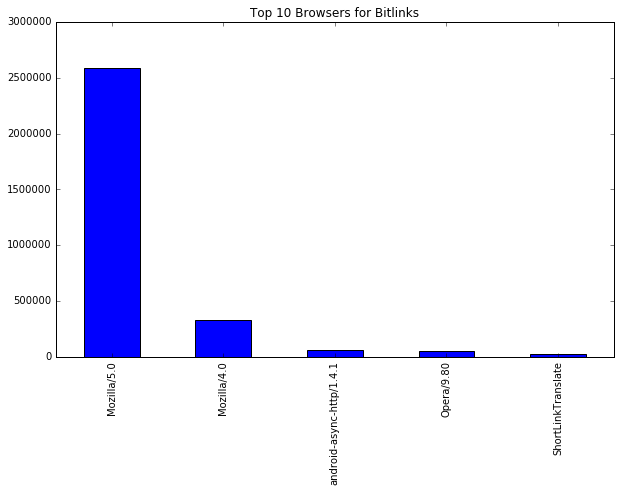

In [18]:
top_browsers.plot(kind='bar', figsize=(10, 6), title='Top 10 Browsers for Bitlinks')

#### Analyzing the number of Instances based on Windows, Mac OS, Android and iPhone systems

Creating a new Dframe where the Null values of User browser agent are ignored

In [19]:
dframe = df[df['a'].notnull()]

Four different Objects are created for classifying the DataFrame based on the different Systems like Windows, Mac OS, Android and iphone

In [20]:
OS_Windows = np.where(dframe['a'].dropna().str.contains('Windows'), 'Windows system', 'Not Windows')
OS_Windows = pd.DataFrame(OS_Windows)
OS_Windows.columns = ['Windows system or Not']

In [21]:
OS_Mac = np.where(dframe['a'].str.contains('Mac OS'), 'Mac OS system', 'Not Mac OS')
OS_Mac = pd.DataFrame(OS_Mac)
OS_Mac.columns = ['Mac OS system or Not']

In [22]:
Android = np.where(dframe['a'].dropna().str.contains('Android'), 'Android system', 'Not Android')
Android = pd.DataFrame(Android)
Android.columns = ['Android system or Not']

In [23]:
iPhone = np.where(dframe['a'].dropna().str.contains('iPhone'), 'iPhone system', 'Not an iPhone')
iPhone = pd.DataFrame(iPhone)
iPhone.columns = ['iPhone device or Not']

Creating new objects to track the number of instances of a record being identified as one among the Windows, Mac OS, Android or iPhone system

In [24]:
win_inst = OS_Windows['Windows system or Not'].str.contains(r'Windows system').sum()
mac_inst = OS_Mac['Mac OS system or Not'].str.contains(r'Mac OS system').sum()
android_inst = Android['Android system or Not'].str.contains(r'Android system').sum()
iphone_inst = iPhone['iPhone device or Not'].str.contains(r'iPhone system').sum()

A new DataFrame is now created based on the data from the previously generated objects, to organize the total number of instances for each of the device

In [25]:
instances = pd.DataFrame( {'Number of Windows instances' : win_inst, 'Number of Mac instances' : mac_inst, 'Number of Android instances' : android_inst, 'Number of iPhone instances' : iphone_inst}, index = ['Type of Device'] )

Visualizing the popularity of different devices/systems for the given dataset

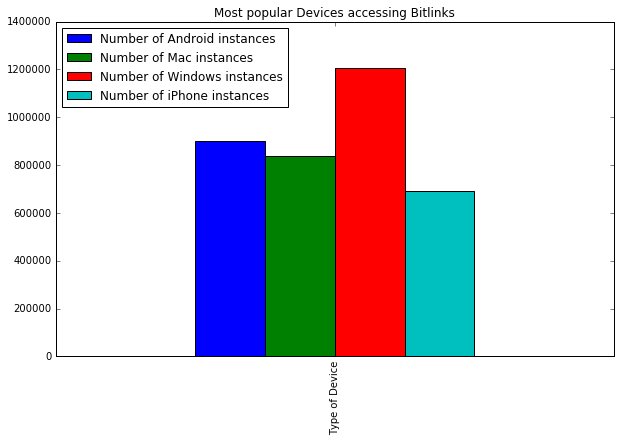

In [26]:
instances.plot(kind='bar', figsize=(10, 6), title='Most popular Devices accessing Bitlinks')

Outputting the numerical values of the number of instances for the different devices/systems

In [27]:
instances

,Number of Android instances,Number of Mac instances,Number of Windows instances,Number of iPhone instances
Type of Device,901739,840072,1207881,691976


#### Analyzing the Top 10 countries with the most number of Bitlink instances

Dealing with the missing and the blank values for the Country column

In [28]:
df['c'].fillna(value='Missing', inplace=True)

In [29]:
df[df['c'] == ''] = 'Unknown'

In [30]:
top_countries = df['c'].value_counts()

Listing out the Top 10 countries with the most number of Bitlink instances

In [31]:
top_countries[:10]

US    1015524
TW     163667
BR     153107
JP     122138
GB     110892
FR      94823
DE      92840
IT      91611
TR      83379
IN      74676
Name: c, dtype: int64

Visualizing the Top 10 Countries for the most number of Bitlink instances for the given dataset

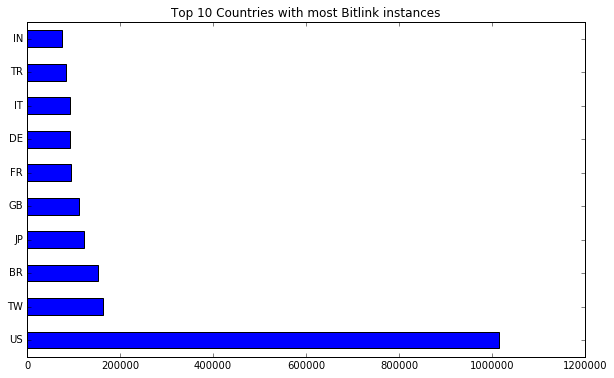

In [32]:
top_countries[:10].plot(kind='barh', figsize=(10, 6), title='Top 10 Countries with most Bitlink instances')

#### Analyzing the Top 10 most active users

The most active users are the ones who play a major role in a company's success and so is the case with Bitlinks! Here, we identify the top 10 most active users based on the user unique hash identifier

##### Analyzing the Top 10 active users based on no. of instances

Based purely upon the number of instances created by a unique user hash identifier, we calculate the top 10 most unique users based on their actions

In [33]:
df['h'].value_counts(sort=True, ascending=False).head(10)

1xupVE6    301532
1xx3efT     71577
1wjzKjw     57032
1lj67KP     42972
18xsLfw     23888
1Im9An5     16381
1vxSX3E     13624
1bsU78E     12907
1w3mXlD      9737
1ceCjf6      9263
Name: h, dtype: int64

##### Analyzing the Top 10 active users based on the most no of repeat-clicks

Repeat-Clicks is a major factor in measuring the 'Clicks per visitor' for Bit.ly users. Here, we sort the users based on their repeat-clicks cookie info. Hence, we find out the top 10 most active users, with the highest frequency of repeat-clicks

In [34]:
repeat_client = dframe.groupby("h").agg({"nk": np.sum, "h": pd.Series.nunique})

In [35]:
repeat_client.sort('nk', ascending=False).head(10)

C:\Users\Chiku\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,nk,h
h,,
1xx3efT,55941,1
1wjzKjw,55786,1
1bsU78E,11821,1
18xsLfw,11300,1
1vxSX3E,8709,1
1Im9An5,7901,1
1N66YJp,5576,1
1yNztpt,5369,1
1HyvxAk,4883,1


## Bitly Challenge Decode Dataset 1 file
### Access the code and the Jupyter notebook at: http://nbviewer.jupyter.org/github/namman2/Data-Analytics-Projects/tree/master/Bitly%20Decode%20Log%20Dataset%20Analysis/